# <center>Project: Data Visualization for Landscaping Company</center>
***
COMP 6934 - Introduction to Data Visualization \
Name: Prabin Kumar Shrestha \
Student ID: 202291331 \
Email: pkshrestha@mun.ca 
***

### Objectives:
__Broad Goal__: To help the landscaping company improve \
__Sub Goals__: \
    1. Identify potential opportunities for growth and development of the company by conducting an analysis of the various service types. \
    2. Deeper understanding of the customers by analyzing their attributes and using the information to develop more targeted and effective strategies. 

____

#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact

#### Constant Values

In [2]:
NUMBER_OF_HOURS_PER_SHIFT = 4

#### Load Data

In [3]:
df_landscaping = pd.read_csv('landscaping.csv', parse_dates=['request_date', 'completion_date']) #load landscaping csv and parse completion_date to datetime type
df_calendar = pd.read_csv('calendar.csv') #load calendar csv
df_employee = pd.read_csv('employees.csv') #load employees csv

#### Process necessary data

In [4]:
# Making new column to store week number of resepective completion_date and request_date
df_landscaping['completion_date_week_number'] = pd.to_numeric(df_landscaping['completion_date'].dt.strftime('%U'));
df_landscaping['request_date_week_number'] = pd.to_numeric(df_landscaping['request_date'].dt.strftime('%U'));

# calculating net profit using invoice amount and material cost
df_landscaping['net_profit'] = df_landscaping['invoice_amount']-df_landscaping['material_costs']

# Changing the data layout of calendar dataset in order to get the employee, job and resepective data the employee has worked. 
# Merging it with employees table gives the hourly wage of resepective employee
df_job_employee_link = pd.melt(df_calendar, id_vars=["date"]).rename(columns={"variable": "employee_id", "value": "job_id"}).dropna().merge(df_employee, on="employee_id").drop_duplicates()

# Multiplying the hourly wage with assumed number of hours per shift. It gives the total wage of the employee for the particular shift on the particular day.
df_job_employee_link['wage_per_shift'] = df_job_employee_link['hourly_wage']*NUMBER_OF_HOURS_PER_SHIFT

In [5]:
# Dictionary to store job_type with its formatted name
job_types_collection = {}

for e in df_landscaping['job_type'].unique():
    job_types_collection[e] = e.replace("_", " ").title()

***
#### First Data Visualization
__Trends in Invoice Amount and Requested Jobs through Spring to Fall 2022__

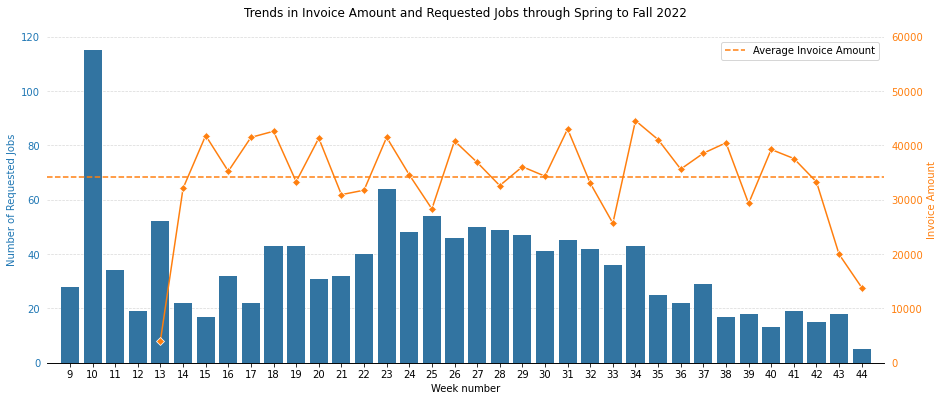

In [6]:
fig, ax1 = plt.subplots(figsize=(15,6)) # Creating Figure instance
ax2 = ax1.twinx() # two axes to use same x axis

# Constants
INVOICE_COLOR = "tab:orange"
REQUESTED_JOB_COLOR = "tab:blue"

# DF creation to append the missing data of completion_date_week_number. 
# It is important to plot the plots on correct axis
df_to_concat = [
    {"completion_date_week_number": 9 },
    {"completion_date_week_number": 10 },
    {"completion_date_week_number": 11 },
    {"completion_date_week_number": 12 },
]
df_landscaping_2 = df_landscaping.append(df_to_concat, ignore_index = True) #appending the missing data

# Plotting the bar plot using countplot (Request Date Week number and Frequency)
sns.countplot(data=df_landscaping_2, x="request_date_week_number", ax=ax1, palette=[REQUESTED_JOB_COLOR], zorder=3)
ax1.set_title('Trends in Invoice Amount and Requested Jobs through Spring to Fall 2022', pad=20)
ax1.set_xlabel('Week number')
ax1.set_ylabel('Number of Requested Jobs', color=REQUESTED_JOB_COLOR)
ax1.set_ylim(0, 120)
ax1.set_xlim(-1, 36)
ax1.set_xticklabels(range(9,45,1))
for e in ax1.get_yticklabels():
    e.set_color(REQUESTED_JOB_COLOR);

# Substracting the week number of completed date by 9
# Reason: Seaborn has changed the x-axis labels to categorical form (which starts from 0). 
#         In order to plot the lineplot on the same axes above, we have to transform the x axis data so that transformed data matches the x-axis ticks from first axis
df_landscaping_2["cdwn_category_converted"] = df_landscaping_2["completion_date_week_number"]-9

# Plotting line plot (Total invoice amount per week vs week number)
sns.lineplot(data=df_landscaping_2, x="cdwn_category_converted" , y="invoice_amount",  marker="D", color=INVOICE_COLOR, estimator="sum", errorbar=None, ax=ax2)
ax2.set_ylabel('Invoice Amount', color=INVOICE_COLOR)
ax2.set_ylim(0, 60000)
for e in ax2.get_yticklabels():
    e.set_color(INVOICE_COLOR);

# Creating dataframe which contains the total invoice amount per week. 
# We calculate the average of each week total amount through out the period to show the average plot in the graph
df_average = df_landscaping_2.dropna().groupby("cdwn_category_converted").sum()
ax2.axhline(y=df_average['invoice_amount'].mean(), color=INVOICE_COLOR, linestyle='--', linewidth=1.5, label='Average Invoice Amount')

# legend
ax2.legend()

# configuring ticks y axis for both axes
ax1.tick_params(axis='y', left=False)
ax2.tick_params(axis='y', right=False)

# showing dashed grid line and hiding the axes behind the plot
ax1.grid(axis='y',color=plt.cm.tab20c(19), linestyle='dashed', linewidth = "0.7")
ax1.set_axisbelow(True)

# hiding axes border except the bottom line
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False);

***
#### Second Data Visualization

__The Relationship between Invoice Amount and Profit Percentage__

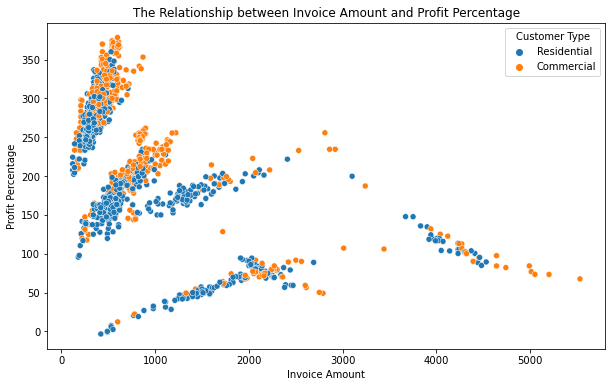

In [7]:
df_landscaping_3 = df_landscaping # creating new dataframe for the visualization
df_landscaping_3['net_profit_percent'] = (df_landscaping_3['net_profit']/df_landscaping_3['material_costs'])*100 # calculating net profit percent based on material cost

fig, ax = plt.subplots(figsize=(10, 6)) # new figure

# Plotting scatter plot with invoice amount in x and net profit percent in y, and hue customer type
ax = sns.scatterplot(x='invoice_amount', y='net_profit_percent', data=df_landscaping_3, hue="customer_type")
ax.set_xlabel("Invoice Amount")
ax.set_ylabel("Profit Percentage")
ax.set_title("The Relationship between Invoice Amount and Profit Percentage")

# Changing label text
new_labels = ['Residential', 'Commercial']
for i,c in enumerate(ax.legend(title="Customer Type").get_texts()):
    c.set_text(new_labels[i])

***
#### Third Data Visualization
__Water Feature and Retaining Wall: Less Frequent and Rated Job Types, Yet Highly Profitable__


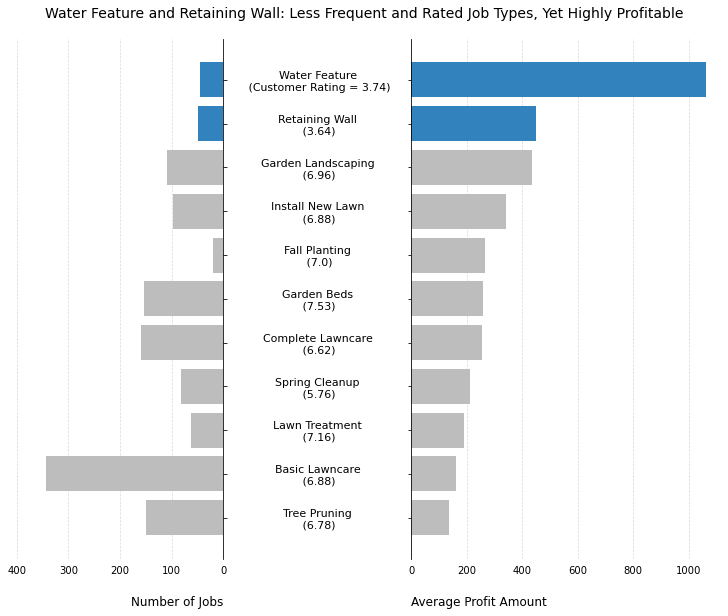

In [8]:
df_grouped_job = df_job_employee_link.groupby('job_id').sum().reset_index() #grouping by job id and summing up to get total wages spent for the job
df_job_with_total_wage = df_landscaping.merge(df_grouped_job, on="job_id", how="left") #merging into df_landscaping to process the wage further for total profit

#calculating net profit from invoice amount, material costs, and total wage per job calculated above
df_job_with_total_wage['net_profit'] = df_job_with_total_wage['invoice_amount']-df_job_with_total_wage['material_costs']-df_job_with_total_wage['wage_per_shift']

#group by job type to get the mean net profit, mean customer satisfaction and total count
df_job_type_group = df_job_with_total_wage.groupby('job_type').agg({'job_id':'size', 'net_profit':'mean', 'customer_satisfaction':'mean'}).sort_values(by="net_profit").reset_index().rename(columns={'job_id': 'count'})

colors = [plt.cm.tab20c(18)]*len(job_types_collection) #Color gray for all bars
colors[-1] = plt.cm.tab20c(0) #first and second bar in rank with blue color
colors[-2] = plt.cm.tab20c(0) #first and second bar in rank with blue color

# Figure size 10X8 looks for the visualization. As a result, font size of figure title, labels and other annotations font size are also increased.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8), gridspec_kw={'width_ratios': [1, 1.5], 'wspace': 0.05}, constrained_layout=True) # creating figure and axes
fig.suptitle('Water Feature and Retaining Wall: Less Frequent and Rated Job Types, Yet Highly Profitable', fontsize=14, y = 1.05) # setting title of the figure

# Bar Graph: Job type and Count (Frequency)
ax1.barh(df_job_type_group['job_type'], df_job_type_group['count'], color=colors) # plotting bar plot in axes 1 to show the frequency of each job type
ax1.set_xticks([0, 100, 200, 300, 400])
ax1.set_xticklabels([0, 100, 200, 300, 400])
ax1.set_xlabel("Number of Jobs", labelpad=20, loc='right', fontsize=12)
ax1.set_ylabel('')
ax1.invert_xaxis() #nverting the axis in order to align with other axes

# Bar Graph: Job type and Net Profit
ax2.barh(df_job_type_group['job_type'], df_job_type_group['net_profit'], color=colors) # plotting bar plot in axes 2 to show the net profit of each job type

labelCollection = []
# Loop to append the mean customer satisfaction rating to the job type label.
for e in job_types_collection.keys():
    rating = (df_job_type_group[df_job_type_group['job_type'] == e]['customer_satisfaction']).values[0]
    if e == (df_job_type_group.tail(1)['job_type']).values[0]:
        labelCollection.append(job_types_collection[e] + f"\n (Customer Rating = {round(rating,2)})")
    else:
        labelCollection.append(job_types_collection[e] + f"\n ({round(rating,2)})")
        
ax2.set_yticks(list(job_types_collection.keys())) # Setting the Formatted Job Types calculated above
ax2.set_yticklabels(labelCollection, ha="center")
[e.set_fontsize(11) for e in ax2.get_yticklabels()] # Changing the font size of the label
ax2.set_xlabel("Average Profit Amount", labelpad=20, loc='left', fontsize=12)
ax2.set_ylabel('')

# hiding borders except inner border of both axes
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# configuring ticks and tick lables of x and y axis for both axes
ax1.tick_params(axis='y', labelleft=False, left=False, labelright=False, right=True)
ax2.tick_params(axis='y', labelleft=True, left=True, labelright=False, right=False, pad=90)
ax1.tick_params(axis='x', labelbottom=True, bottom=False)
ax2.tick_params(axis='x', labelbottom=True, bottom=False)

# showing dashed grid line in both axes
ax1.grid(axis='x',color=plt.cm.tab20c(19), linestyle='dashed', linewidth = "0.7")
ax2.grid(axis='x',color=plt.cm.tab20c(19), linestyle='dashed', linewidth = "0.7")

# hiding the axes behind the bar plot
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

plt.show()

***
#### Fourth Visualization
__Distribution of Different Attributes based on Job Type and Postal Code__

In [6]:
# Grouping to make the data ready for heatmap
df_grouped = df_landscaping.groupby(['customer_postal_code', 'job_type']).agg({'customer_satisfaction':'mean', 'job_id':'count', 'invoice_amount':'mean', 'material_costs':'mean', 'net_profit':'mean'}).rename(columns={'job_id':'total_jobs'}).reset_index()
df_grouped['job_type_formatted'] = df_grouped['job_type'].apply(lambda x: job_types_collection[x]) #formatted job type

# Available options for the radio button
dictRadios = {
    'Customer Rating' : 'customer_satisfaction', 
    'Total Jobs': 'total_jobs', 
    'Invoice Amount': 'invoice_amount', 
    'Material Costs': 'material_costs', 
    'Net Profit (Invoice Amount - Material Costs)': 'net_profit'
}

# interact interface provided by ipywidgets
@interact(dataType = widgets.widgets.RadioButtons(
    options=dictRadios,
    value='customer_satisfaction',
    description='Choose attribute:',
    style={'description_width': 'initial'},
    layout={'width': 'initial'}
))
def custom_widget_event(dataType):
    # projecting the dataframe to get necessary columns only
    df_grouped_current = df_grouped[[dataType, 'customer_postal_code', 'job_type_formatted']]
    #pivoting the table to prepare the data frame for heat map
    df_hm = df_grouped_current.pivot(index='job_type_formatted', columns='customer_postal_code', values=dataType).fillna(0.0); #filling empty data with 0
    
    fig, ax = plt.subplots(figsize=(10,8)) # Creating instance for figure
    sns.heatmap(data=df_hm, ax=ax, cmap="mako"); # Plotting heat map
    ax.set_xlabel("Postal Code", labelpad=14)
    ax.set_ylabel("Job Types", labelpad=14)
    ax.set_title(f"Distribution of {list(dictRadios.keys())[list(dictRadios.values()).index(dataType)]} based on Job Type and Postal Code", pad=20);


interactive(children=(RadioButtons(description='Choose attribute:', layout=Layout(width='initial'), options={'…